In [2]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install openpyxl

In [ ]:
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    df = pd.read_excel(file)
    
    # Filter the data
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for the direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Mean score for morning rush and afternoon rush
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_L1'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_L1'].mean()

    mean_score_R_OS_L = df_road_4HR_HM_L['OS_L1'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_L1'].mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning', 
        'Direction': 'R',  
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  
        'Direction': 'R',      
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning', 
        'Direction': 'L',   
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon', 
        'Direction': 'L',   
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('PEOPLEmean_scores_road4_HR_R_2012_2019.xlsx', index=False)

display(df_results)



c:\Users\daank\anaconda3\envs\TIL6022\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,4405.902778
1,2012,Afternoon,R,5824.763889
2,2012,Morning,L,5480.044118
3,2012,Afternoon,L,4541.897059
4,2013,Morning,R,4943.446154
5,2013,Afternoon,R,6473.738462
6,2013,Morning,L,6334.644068
7,2013,Afternoon,L,5218.033898
8,2014,Morning,R,4956.596774
9,2014,Afternoon,R,6622.983871


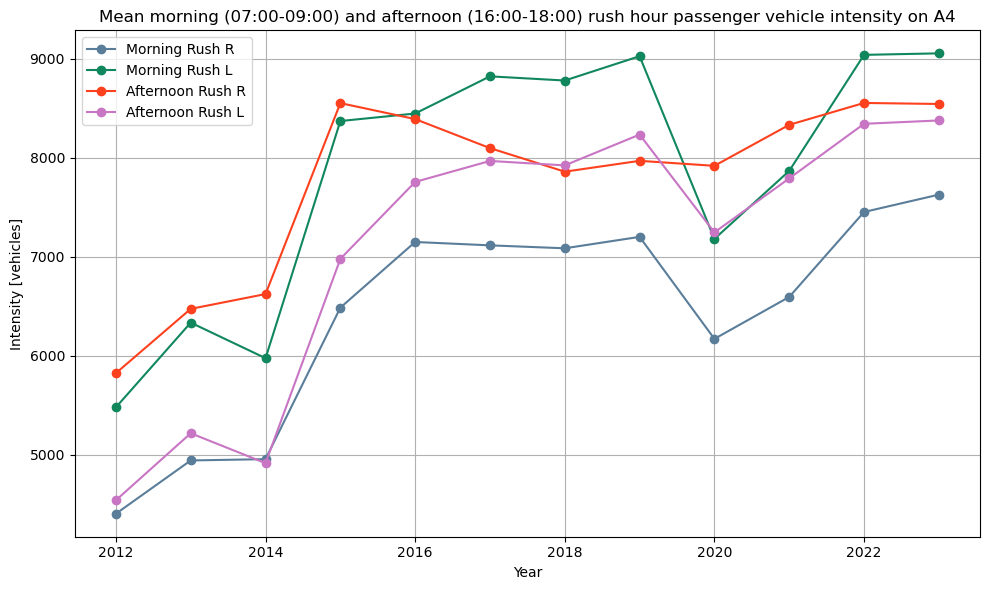

In [2]:
df = pd.read_excel('PEOPLEmean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], color="xkcd:steel blue", label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], color='xkcd:dark sea green', label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], color='xkcd:orange red', label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], color='xkcd:orchid', label='Afternoon Rush L', marker='o')

plt.title('Mean morning (07:00-09:00) and afternoon (16:00-18:00) rush hour passenger vehicle intensity on A4')
plt.xlabel('Year')
plt.ylabel('Intensity [vehicles]')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Make an empty list
results = []

# Loop through the datasets
for year, file in data_files.items():
    df = pd.read_excel(file)
    
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score
    mean_score_R_OS_R = (df_road_4HR_HM_R['OS_AL']*(df_road_4HR_HM_R['OS_vrachtperc']/100)).mean()
    mean_score_R_AS_R = (df_road_4HR_HM_R['AS_AL']*(df_road_4HR_HM_R['AS_vrachtperc']/100)).mean()

    mean_score_R_OS_L = (df_road_4HR_HM_L['OS_AL']*(df_road_4HR_HM_L['OS_vrachtperc']/100)).mean()
    mean_score_R_AS_L = (df_road_4HR_HM_L['AS_AL']*(df_road_4HR_HM_L['AS_vrachtperc']/100)).mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  
        'Direction': 'R',   
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon', 
        'Direction': 'R',     
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  
        'Direction': 'L',   
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  
        'Direction': 'L',      
        'Mean Score': mean_score_R_AS_L
    })

df_results = pd.DataFrame(results)

df_results.to_excel('FREIGHTmean_scores_road4_HR_R_2012_2019.xlsx', index=False)

display(df_results)


/opt/anaconda3/envs/TIL6022/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,454.719444
1,2012,Afternoon,R,405.603333
2,2012,Morning,L,447.642647
3,2012,Afternoon,L,389.734118
4,2013,Morning,R,614.654308
5,2013,Afternoon,R,534.798308
6,2013,Morning,L,543.099153
7,2013,Afternoon,L,478.370169
8,2014,Morning,R,563.149677
9,2014,Afternoon,R,556.033871


In [5]:
extra_table = df_results[df_results['Year'].isin([2018, 2019, 2020])]

display(extra_table)

,Year,Rush,Direction,Mean Score
24,2018,Morning,R,748.407778
25,2018,Afternoon,R,734.871481
26,2018,Morning,L,1021.835600
27,2018,Afternoon,L,848.408000
28,2019,Morning,R,735.934074
29,2019,Afternoon,R,629.888704
30,2019,Morning,L,852.326800
31,2019,Afternoon,L,687.423800
32,2020,Morning,R,847.319783
33,2020,Afternoon,R,735.153043


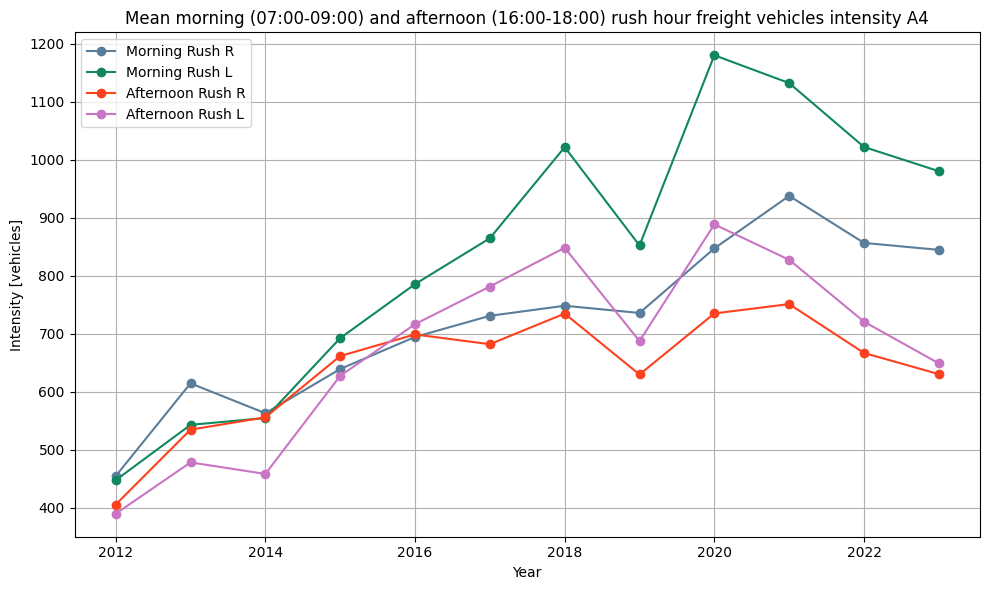

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('FREIGHTmean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], color="xkcd:steel blue", label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], color='xkcd:dark sea green', label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], color='xkcd:orange red', label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], color='xkcd:orchid', label='Afternoon Rush L', marker='o')

plt.title('Mean morning (07:00-09:00) and afternoon (16:00-18:00) rush hour freight vehicles intensity A4')
plt.xlabel('Year')
plt.ylabel('Intensity [vehicles]')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    print(f"Year: {year}, Original Rows: {len(df)}, Filtered Rows: {len(df_road_4HR)}")
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    print(f"Year: {year}, Final Rows (HM): {len(df_road_4HR_HM)}")
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = (df_road_4HR_HM_R['OS_AL'] * (df_road_4HR_HM_R['OS_vrachtperc'] / 100)).mean()
    mean_score_R_AS_R = (df_road_4HR_HM_R['AS_AL'] * (df_road_4HR_HM_R['AS_vrachtperc'] / 100)).mean()
    mean_score_R_OS_L = (df_road_4HR_HM_L['OS_AL'] * (df_road_4HR_HM_L['OS_vrachtperc'] / 100)).mean()
    mean_score_R_AS_L = (df_road_4HR_HM_L['AS_AL'] * (df_road_4HR_HM_L['AS_vrachtperc'] / 100)).mean()

    # Log the calculated mean scores
    print(f"Year: {year}, Mean Score R Morning: {mean_score_R_OS_R}, Mean Score R Afternoon: {mean_score_R_AS_R}")

    # Store the results...


Year: 2012, Original Rows: 7572, Filtered Rows: 163
Year: 2012, Final Rows (HM): 140
Year: 2012, Mean Score R Morning: 454.7194444444445, Mean Score R Afternoon: 405.60333333333335


/opt/anaconda3/envs/TIL6022/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Year: 2013, Original Rows: 7567, Filtered Rows: 155
Year: 2013, Final Rows (HM): 124
Year: 2013, Mean Score R Morning: 614.6543076923077, Mean Score R Afternoon: 534.7983076923078
Year: 2014, Original Rows: 7860, Filtered Rows: 163
Year: 2014, Final Rows (HM): 130
Year: 2014, Mean Score R Morning: 563.1496774193549, Mean Score R Afternoon: 556.0338709677419
Year: 2015, Original Rows: 7760, Filtered Rows: 129
Year: 2015, Final Rows (HM): 90
Year: 2015, Mean Score R Morning: 639.3212500000001, Mean Score R Afternoon: 661.7331250000001
Year: 2016, Original Rows: 8659, Filtered Rows: 135
Year: 2016, Final Rows (HM): 96
Year: 2016, Mean Score R Morning: 694.5938000000001, Mean Score R Afternoon: 698.9284
Year: 2017, Original Rows: 8683, Filtered Rows: 145
Year: 2017, Final Rows (HM): 105
Year: 2017, Mean Score R Morning: 731.0389090909092, Mean Score R Afternoon: 682.1149090909091
Year: 2018, Original Rows: 8715, Filtered Rows: 144
Year: 2018, Final Rows (HM): 104
Year: 2018, Mean Score R M